#Customer Churn Prediction for a Telecom Company


Customer churn (customers leaving a service) is a major problem for telecom companies. In this project, I
 will build a data science solution to predict whether a customer is likely to churn based on their usage patterns, service details, and payment behavior.

**Problem Statement**

The company wants to identify customers who are likely to leave so that retention strategies (offers, discounts, support calls) can be applied in advance.

Goal: Build a machine learning model that predicts Churn (Yes/No).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv('/content/telecom_churn_large_dataset.csv')
data.head(10)

,customer_id,age,gender,tenure_months,monthly_charges,internet_service,contract_type,payment_method,customer_support_calls,total_charges,churn
0,CUST00001,56,Female,45,387,Fiber,Two year,Credit Card,3,17415,No
1,CUST00002,46,Male,19,689,DSL,Month-to-month,UPI,3,13091,Yes
2,CUST00003,32,Female,5,624,NaN,Two year,Cash,4,3120,No
3,CUST00004,60,Male,32,456,DSL,Month-to-month,UPI,4,14592,Yes
4,CUST00005,25,Female,44,876,NaN,Month-to-month,Credit Card,6,38544,Yes
5,CUST00006,38,Male,1,436,Fiber,Month-to-month,Debit Card,4,436,Yes
6,CUST00007,56,Male,23,727,Fiber,Month-to-month,UPI,0,16721,No
7,CUST00008,36,Female,37,751,Fiber,Month-to-month,Credit Card,2,27787,No
8,CUST00009,40,Male,8,440,Fiber,Month-to-month,Credit Card,5,3520,Yes
9,CUST00010,28,Female,13,382,DSL,Two year,UPI,6,4966,Yes


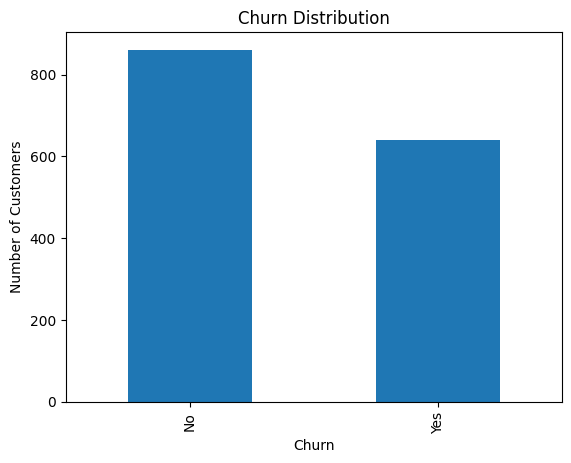

In [ ]:
plt.figure()
data['churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()


<Figure size 640x480 with 0 Axes>

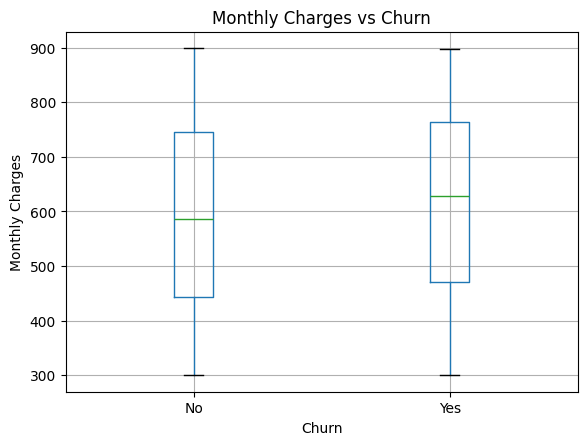

In [ ]:
plt.figure()
data.boxplot(column='monthly_charges', by='churn')
plt.title("Monthly Charges vs Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


<Figure size 640x480 with 0 Axes>

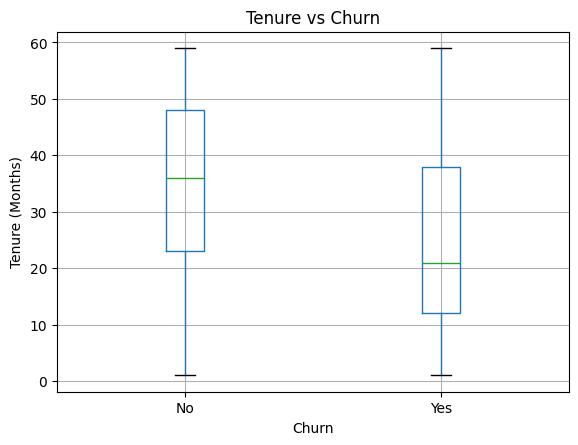

In [ ]:
plt.figure()
data.boxplot(column='tenure_months', by='churn')
plt.title("Tenure vs Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


<Figure size 640x480 with 0 Axes>

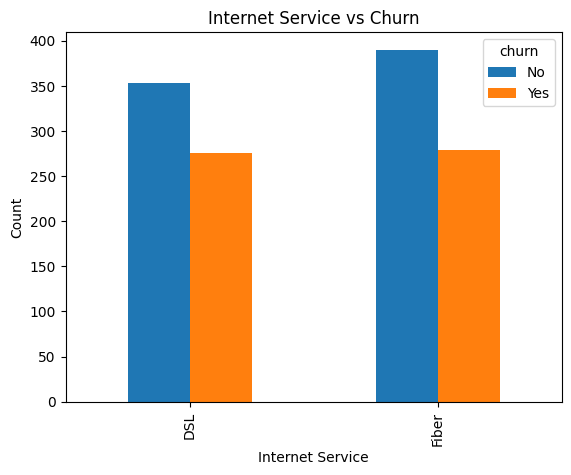

In [ ]:
plt.figure()
pd.crosstab(data['internet_service'], data['churn']).plot(kind='bar')
plt.title("Internet Service vs Churn")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()


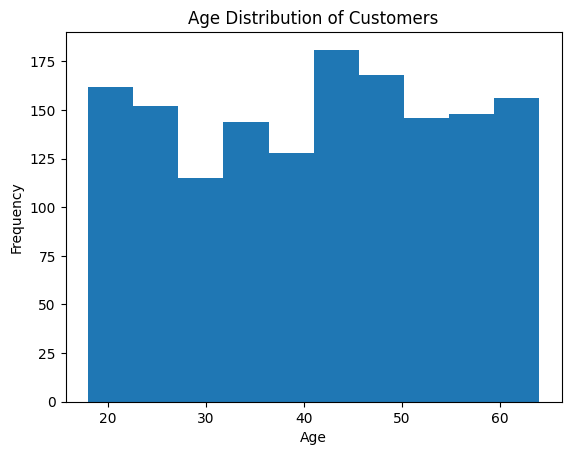

In [ ]:
plt.figure()
plt.hist(data['age'], bins=10)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<Figure size 640x480 with 0 Axes>

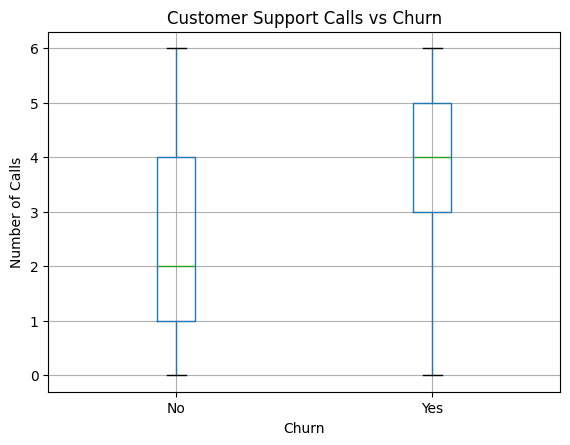

In [ ]:
plt.figure()
data.boxplot(column='customer_support_calls', by='churn')
plt.title("Customer Support Calls vs Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Number of Calls")
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customer_id             1500 non-null   object
 1   age                     1500 non-null   int64 
 2   gender                  1500 non-null   object
 3   tenure_months           1500 non-null   int64 
 4   monthly_charges         1500 non-null   int64 
 5   internet_service        1298 non-null   object
 6   contract_type           1500 non-null   object
 7   payment_method          1500 non-null   object
 8   customer_support_calls  1500 non-null   int64 
 9   total_charges           1500 non-null   int64 
 10  churn                   1500 non-null   object
dtypes: int64(5), object(6)
memory usage: 129.0+ KB


In [ ]:
data.describe()


,age,tenure_months,monthly_charges,customer_support_calls,total_charges
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,41.285333,30.372667,602.580667,3.038667,18246.672000
std,13.480495,16.905985,172.220795,1.986908,11670.546553
min,18.000000,1.000000,300.000000,0.000000,436.000000
25%,29.000000,16.000000,454.750000,1.000000,8711.750000
50%,42.000000,30.000000,603.000000,3.000000,16871.500000
75%,53.000000,45.000000,751.000000,5.000000,26046.000000
max,64.000000,59.000000,899.000000,6.000000,52392.000000


In [ ]:
data.isnull().sum()

,0
customer_id,0
age,0
gender,0
tenure_months,0
monthly_charges,0
internet_service,202
contract_type,0
payment_method,0
customer_support_calls,0
total_charges,0


In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'internet_service', 'contract_type', 'payment_method', 'churn']:
    data[col] = le.fit_transform(data[col])

In [ ]:
# Features & target
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8266666666666667
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       208
           1       0.86      0.73      0.79       167

    accuracy                           0.83       375
   macro avg       0.83      0.82      0.82       375
weighted avg       0.83      0.83      0.82       375



In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8506666666666667
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       208
           1       0.89      0.75      0.82       167

    accuracy                           0.85       375
   macro avg       0.86      0.84      0.85       375
weighted avg       0.86      0.85      0.85       375



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[193  15]
 [ 41 126]]
